# Import Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("customer_segmentation.csv")

In [3]:
print(df.head())

   CustomerID  Gender  Age  Annual_Income_k  Spending_Score  Family_Size  \
0           1  Female   18            32.98              28            3   
1           2  Female   26            29.17              22            5   
2           3  Female   27            33.89              20            3   
3           4    Male   23            39.14              30            3   
4           5  Female   28            28.60              33            3   

   Tenure_yrs Profession  
0           8  Executive  
1          10     Doctor  
2           5     Artist  
3           6     Doctor  
4           9      Other  


# Data Preprocessing

In [4]:
# Drop CustomerID (not useful for clustering)
df_clean = df.drop("CustomerID", axis=1)

# Encode categorical columns
le = LabelEncoder()
df_clean["Gender"] = le.fit_transform(df_clean["Gender"])
df_clean["Profession"] = le.fit_transform(df_clean["Profession"])

# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clean)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\A

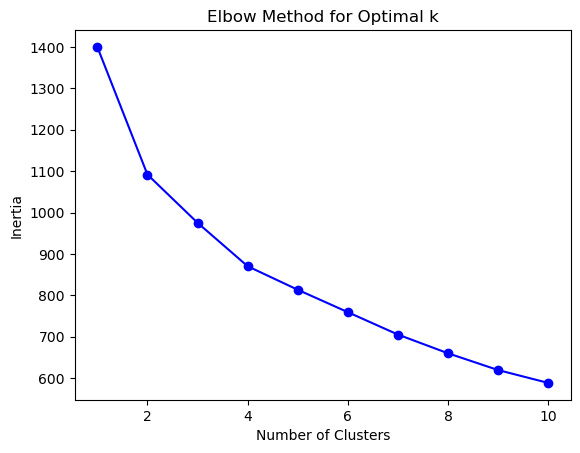

In [5]:
# Find Optimal Number of Clusters (Elbow Method)

inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Apply KMeans Clustering

In [6]:
# Assume best k=4 (from elbow plot)
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(scaled_data)

# Check sample
print(df.head())

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   CustomerID  Gender  Age  Annual_Income_k  Spending_Score  Family_Size  \
0           1  Female   18            32.98              28            3   
1           2  Female   26            29.17              22            5   
2           3  Female   27            33.89              20            3   
3           4    Male   23            39.14              30            3   
4           5  Female   28            28.60              33            3   

   Tenure_yrs Profession  Cluster  
0           8  Executive        1  
1          10     Doctor        1  
2           5     Artist        1  
3           6     Doctor        1  
4           9      Other        1  


# Visualize Clusters

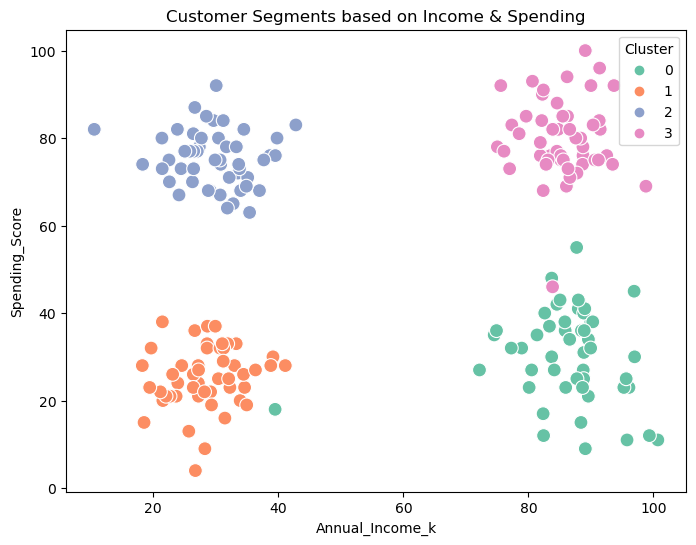

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Annual_Income_k", y="Spending_Score", hue="Cluster", data=df, palette="Set2", s=100)
plt.title("Customer Segments based on Income & Spending")
plt.show()

# Analyze Segments

In [8]:
cluster_summary = df.groupby("Cluster")[["Age","Annual_Income_k","Spending_Score","Family_Size","Tenure_yrs"]].mean()
print(cluster_summary)

               Age  Annual_Income_k  Spending_Score  Family_Size  Tenure_yrs
Cluster                                                                     
0        48.320000        86.210000       30.280000     3.100000    5.720000
1        29.020408        28.426327       25.346939     2.938776    5.142857
2        40.440000        29.693400       75.180000     3.080000    5.560000
3        62.686275        85.574314       79.705882     3.196078    4.607843


## This project covers: data cleaning → encoding → scaling → clustering → visualization → insights.